# Apprentissage supervisé

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target
print(x.shape)
print(y.shape)

(150, 4)
(150,)


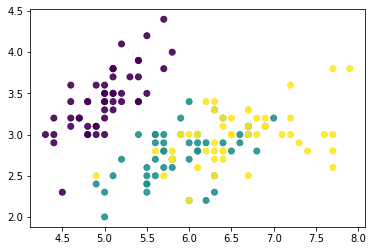

In [3]:
plt.scatter(x[:,0],x[:,1],c=y,alpha=0.9)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)
print("train set" ,x_train.shape)
print("test set" ,x_test.shape)

train set (105, 4)
test set (45, 4)


Text(0.5, 1.0, 'train set')

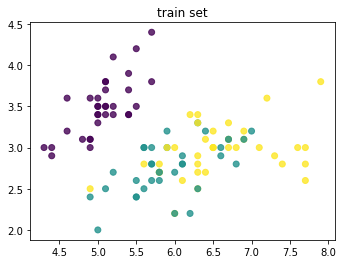

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,alpha=0.8)
plt.title("train set")

Text(0.5, 1.0, 'test set')

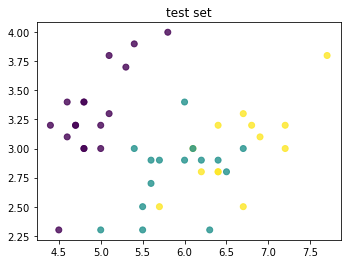

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(122)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,alpha=0.8)
plt.title("test set")

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# 1/Entraîner les deux modèles (SVM et KNN) sur la base des iris de Fisher en utilisant les deux stratégies d’apprentissage (traditionnel et validation croisée).

# KNN

In [9]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
print("train score:",KNN.score(x_train,y_train))
print("test score:",KNN.score(x_test,y_test))

train score: 0.9428571428571428
test score: 1.0


In [10]:
y_predict = KNN.predict(x_test)
print("Le taux d'erreur: ",1.0 - accuracy_score(y_test, y_predict ))

Le taux d'erreur:  0.0


# SVM

In [11]:
SVM=SVC()
SVM.fit(x_train,y_train)
print("train score:",SVM.score(x_train,y_train))
print("test score:",SVM.score(x_test,y_test))

train score: 0.9714285714285714
test score: 0.9777777777777777


In [12]:
y_predict = SVM.predict(x_test)
print("Le taux d'erreur: ",1.0 - accuracy_score(y_test, y_predict ))

Le taux d'erreur:  0.022222222222222254


# cross validation method

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
from sklearn.model_selection import cross_val_score

# KNN


In [15]:
val,val1,val2,val3=[],[],[],[]
for i in range(1,50):
    score_knn_val=cross_val_score(KNeighborsClassifier(i),x_train,y_train,cv=5,scoring="accuracy").mean()
    val.append(score_knn_val)

    recall_knn_val=cross_val_score(KNeighborsClassifier(i),x_train,y_train,cv=5,scoring="recall_macro").mean()
    val1.append(recall_knn_val)

    precision_knn_val=cross_val_score(KNeighborsClassifier(i),x_train,y_train,cv=5,scoring="precision_macro").mean()
    val2.append(precision_knn_val)

    f1_knn_val=cross_val_score(KNeighborsClassifier(i),x_train,y_train,cv=5,scoring="f1_macro").mean()
    val3.append(f1_knn_val)


In [16]:
print("recall score: ",recall_knn_val)
print("precision score:",precision_knn_val)
print("f1 score: ",f1_knn_val)
print("score_knn_val: ", score_knn_val)
print("Error score: ",1-score_knn_val)

recall score:  0.8916666666666666
precision score: 0.9209427609427611
f1 score:  0.8835655303302362
score_knn_val:  0.8857142857142858
Error score:  0.11428571428571421


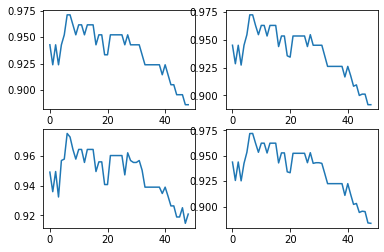

In [17]:
plt.subplot(2,2,1)
plt.plot(val)
plt.subplot(2,2,2)
plt.plot(val1)
plt.subplot(2,2,3)
plt.plot(val2)
plt.subplot(2,2,4)
plt.plot(val3)

# SVM

In [18]:
val,val1,val2,val3=[],[],[],[]
for i in range(1,50):
    score_SVM_val=cross_val_score(SVC(i),x_train,y_train,cv=5,scoring="accuracy").mean()
    val.append(score_SVM_val)

    recall_SVM_val=cross_val_score(SVC(i),x_train,y_train,cv=5,scoring="recall_macro").mean()
    val1.append(recall_SVM_val)

    precision_SVM_val=cross_val_score(SVC(i),x_train,y_train,cv=5,scoring="precision_macro").mean()
    val2.append(precision_SVM_val)

    f1_SVM_val=cross_val_score(SVC(i),x_train,y_train,cv=5,scoring="f1_macro").mean()
    val3.append(f1_SVM_val)


In [19]:
print("recall score: ",recall_SVM_val)
print("precision score:",precision_SVM_val)
print("f1 score: ",f1_SVM_val)
print("Error score: ",1-score_SVM_val)

recall score:  0.9630952380952381
precision score: 0.9685185185185186
f1 score:  0.9620940170940171
Error score:  0.03809523809523818


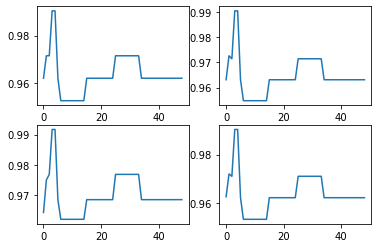

In [20]:
plt.subplot(2,2,1)
plt.plot(val)
plt.subplot(2,2,2)
plt.plot(val1)
plt.subplot(2,2,3)
plt.plot(val2)
plt.subplot(2,2,4)
plt.plot(val3)

# 2/ Construire et visualiser la matrice de confusion pour chacun des modèles (et pour les deux stratégies d’apprentissage) sur l’ensemble de test. Qu’observez-vous ?


# KNN

[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]


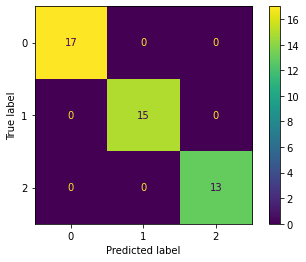

In [21]:
print(confusion_matrix(y_test,KNN.predict(x_test)))
confusion_matrix(y_test,KNN.predict(x_test))#
cm = confusion_matrix(y_test,KNN.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# SVM

[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


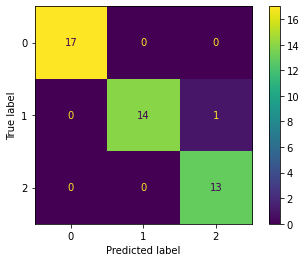

In [22]:
print(confusion_matrix(y_test,SVM.predict(x_test)))
cm = confusion_matrix(y_test,SVM.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


# 3/ Evaluer la performance de SVM et KNN, en utilisant les métriques : Rappel, Précision, Fscore, et Taux d’erreur.


# KNN

In [23]:
print(classification_report(y_test, KNN.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [24]:
recall_KNN_Trad=recall_score(y_test, KNN.predict(x_test), average='macro')
precision_KNN_Trad=precision_score(y_test, KNN.predict(x_test), average='macro')
f1_KNN_Trad=f1_score(y_test, KNN.predict(x_test), average='macro')
erreur_KNN_trad=1-accuracy_score(y_test, KNN.predict(x_test))
print("Le f-score:",f1_KNN_Trad)
print("Le rappel:",recall_KNN_Trad)
print("La precison:",precision_KNN_Trad)
print("accurancy:",accuracy_score(y_test, KNN.predict(x_test)))


Le f-score: 1.0
Le rappel: 1.0
La precison: 1.0
accurancy: 1.0


# SVM

In [25]:
print(classification_report(y_test, SVM.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [26]:
recall_SVM_Trad=recall_score(y_test, SVM.predict(x_test), average='macro')
precision_SVM_Trad=precision_score(y_test, SVM.predict(x_test), average='macro')
f1_SVM_Trad=f1_score(y_test,SVM.predict(x_test), average='macro')
erreur_SVM_Trad=1-accuracy_score(y_test, SVM.predict(x_test))
print("Le f-score:",f1_SVM_Trad)
print("Le rappel:",recall_SVM_Trad)
print("La precison:",precision_SVM_Trad)
print("accurancy:",accuracy_score(y_test, SVM.predict(x_test)))


Le f-score: 0.9761600681140911
Le rappel: 0.9777777777777779
La precison: 0.9761904761904763
accurancy: 0.9777777777777777


==>le modèle de KNN donne des meilleurs résulatats tandis que SVM donne aussi des bonnes résulatas mais un peu moins que les
résulatats KNN

# 4/ Etudiez l’influence du paramètre k sur la performance de KNN.


Text(0, 0.5, 'testing accuracy')

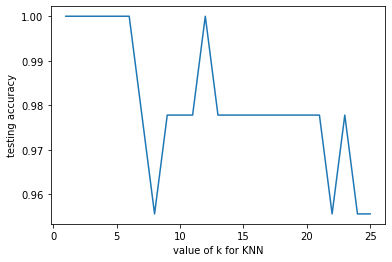

In [27]:
from sklearn import metrics
k_range=range(1,26)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores[k] =metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
plt.plot(k_range,scores_list)
plt.xlabel("value of k for KNN")
plt.ylabel("testing accuracy")


on peut choisir la valeur la plus proche a 100% (k=13)

# 5/ Comparer la performance de SVM, KNN, DT et RF, et donner une interprétation des résultats obtenus

In [29]:
evaluation = {
"KNN-traditionnel":{"recall":recall_KNN_Trad,"precision":precision_KNN_Trad,"F1-score":f1_KNN_Trad  , "Erreur": 1 - f1_KNN_Trad   },
"knn-validation_croise":{"recall":recall_knn_val,"precision":precision_knn_val,"F1-score":f1_knn_val , "Erreur": 1 - f1_knn_val},
"SVM-traditionnel":{"recall":recall_SVM_Trad,"precision":precision_SVM_Trad,"F1-score":f1_SVM_Trad  , "Erreur": 1 - f1_SVM_Trad },
"SVM-validation_croise":{"recall":recall_SVM_val,"precision":precision_SVM_val,"F1-score":f1_SVM_val , "Erreur": 1 -f1_SVM_val }
}

In [30]:
pd.DataFrame.from_dict(evaluation)

,KNN-traditionnel,knn-validation_croise,SVM-traditionnel,SVM-validation_croise
recall,1.0,0.891667,0.977778,0.963095
precision,1.0,0.920943,0.976190,0.968519
F1-score,1.0,0.883566,0.976160,0.962094
Erreur,0.0,0.116434,0.023840,0.037906


les modèles qui donne des meuilleurs résultats et moins d'erreur sont KNN et SVM appliqué sur la stratégie traditionnel,donc on conclut que la stratégie traditionnel donne des bons résultats pour KNN et SVM en comparant avec validation croisé 